#### Previsione del prezzo di Facebook con regressione lineare e support vector machine
Dati scaricati da Quandl

https://www.youtube.com/watch?v=EYnC4ACIt2g&ab_channel=ComputerScience

In [2]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader.data as web


importiamo i dati

In [2]:
start_date = '2012-05-18'
end_date = '2018-03-27'
df = web.get_data_yahoo('FB', start_date, end_date) 
#df = quandl.get("WIKI/FB")

In [5]:
len(df)

252

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-31,382.760010,378.799988,379.950012,379.380005,12345400,379.380005
2021-09-01,384.329987,378.809998,379.589996,382.049988,11567200,382.049988
2021-09-02,381.750000,374.059998,381.500000,375.279999,14832900,375.279999
2021-09-03,377.160004,373.109985,374.750000,376.260010,7509600,376.260010
2021-09-07,382.959991,373.149994,375.880005,382.179993,10793800,382.179993


In [5]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df[['High_shifted', 'Low_shifted', 'Open_shifted', 'Close_shifted', 'Volume_shifted', 'Adj Close_shifted']] = df.shift(-1)

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close,High_shifted,Low_shifted,Open_shifted,Close_shifted,Volume_shifted,Adj Close_shifted
Date,,,,,,,,,,,,
2021-08-31,382.760010,378.799988,379.950012,379.380005,12345400,379.380005,384.329987,378.809998,379.589996,382.049988,11567200.0,382.049988
2021-09-01,384.329987,378.809998,379.589996,382.049988,11567200,382.049988,381.750000,374.059998,381.500000,375.279999,14832900.0,375.279999
2021-09-02,381.750000,374.059998,381.500000,375.279999,14832900,375.279999,377.160004,373.109985,374.750000,376.260010,7509600.0,376.260010
2021-09-03,377.160004,373.109985,374.750000,376.260010,7509600,376.260010,382.959991,373.149994,375.880005,382.179993,10793800.0,382.179993
2021-09-07,382.959991,373.149994,375.880005,382.179993,10793800,382.179993,380.869995,374.790009,380.160004,377.570007,11067200.0,377.570007
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,168.880005,164.020004,165.179993,168.779999,15550500,168.779999,170.919998,161.669998,168.479996,161.779999,23979700.0,161.779999
2022-08-26,170.919998,161.669998,168.479996,161.779999,23979700,161.779999,163.050003,159.009995,160.660004,159.169998,20052700.0,159.169998
2022-08-29,163.050003,159.009995,160.660004,159.169998,20052700,159.169998,161.660004,155.910004,160.350006,157.160004,19546900.0,157.160004


Selezioniamo la colonna Adj Close

In [12]:
df = df[['Adj Close']]

In [9]:
len(df)

252

In [10]:
df.head()

,Adj Close
Date,
2021-08-16,366.559998
2021-08-17,358.450012
2021-08-18,355.450012
2021-08-19,355.119995
2021-08-20,359.369995


In [11]:
# Numero di giorni nel futuro che si vogliono prevedere
forecast_out = 1

In [9]:
# Creiamo una colonna con la variabile da prevedere
df['Prediction'] = df[['Adj Close']].shift(-1)

In [13]:
df.head()

,Adj Close,Prediction
Date,,
2021-08-16,366.559998,358.450012
2021-08-17,358.450012,355.450012
2021-08-18,355.450012,355.119995
2021-08-19,355.119995,359.369995
2021-08-20,359.369995,363.350006


In [14]:
df.tail()

,Adj Close,Prediction
Date,,
2022-08-09,168.529999,178.339996
2022-08-10,178.339996,177.490005
2022-08-11,177.490005,180.500000
2022-08-12,180.500000,180.889999
2022-08-15,180.889999,NaN


In [15]:
df.tail()

,Adj Close,Prediction
Date,,
2022-08-09,168.529999,178.339996
2022-08-10,178.339996,177.490005
2022-08-11,177.490005,180.500000
2022-08-12,180.500000,180.889999
2022-08-15,180.889999,NaN


In [13]:
# Stabiliamo quanti "n" giorni in avanti vogliamo prevedere
forecast_out = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

C:\Users\samue\AppData\Local\Temp/ipykernel_1136/1070031000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-forecast_out)


In [16]:
df.head(31)

,Adj Close,Prediction
Date,,
2021-08-31,379.380005,324.540009
2021-09-01,382.049988,328.529999
2021-09-02,375.279999,324.760010
2021-09-03,376.260010,335.339996
2021-09-07,382.179993,339.989990
2021-09-08,377.570007,340.779999
2021-09-09,378.000000,341.880005
2021-09-10,378.690002,324.609985
2021-09-13,376.510010,328.690002


In [17]:
df.shape

(253, 2)

In [18]:
# Creiamo un data set indipendente (X), trasformando il df in un array
X = np.array(df.drop(['Prediction'], 1))

C:\Users\samue\AppData\Local\Temp/ipykernel_1136/4168697561.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))


In [19]:
X.shape

(253, 1)

In [23]:
a = [1, 2, 3, 4, 5]

a[:-2]

[1, 2, 3]

In [20]:
# Eliminiamo le ultime "n" righe
X = X[:-forecast_out]

In [22]:
print(X.shape)

X

(223, 1)


array([[379.38000488],
       [382.04998779],
       [375.27999878],
       [376.26000977],
       [382.17999268],
       [377.57000732],
       [378.        ],
       [378.69000244],
       [376.51000977],
       [376.52999878],
       [373.92001343],
       [373.05999756],
       [364.72000122],
       [355.70001221],
       [357.48001099],
       [343.20999146],
       [345.95999146],
       [352.95999146],
       [353.57998657],
       [340.6499939 ],
       [339.60998535],
       [339.39001465],
       [343.01000977],
       [326.23001099],
       [332.95999146],
       [333.64001465],
       [329.22000122],
       [330.04998779],
       [325.45001221],
       [323.76998901],
       [324.54000854],
       [328.52999878],
       [324.76000977],
       [335.33999634],
       [339.98999023],
       [340.77999878],
       [341.88000488],
       [324.60998535],
       [328.69000244],
       [315.80999756],
       [312.22000122],
       [316.92001343],
       [323.57000732],
       [329

In [20]:
print(X)
# attenzione, abbiamo creato una lista di liste

[[366.55999756]
 [358.45001221]
 [355.45001221]
 [355.11999512]
 [359.36999512]
 [363.3500061 ]
 [365.51000977]
 [368.39001465]
 [364.38000488]
 [372.63000488]
 [380.66000366]
 [379.38000488]
 [382.04998779]
 [375.27999878]
 [376.26000977]
 [382.17999268]
 [377.57000732]
 [378.        ]
 [378.69000244]
 [376.51000977]
 [376.52999878]
 [373.92001343]
 [373.05999756]
 [364.72000122]
 [355.70001221]
 [357.48001099]
 [343.20999146]
 [345.95999146]
 [352.95999146]
 [353.57998657]
 [340.6499939 ]
 [339.60998535]
 [339.39001465]
 [343.01000977]
 [326.23001099]
 [332.95999146]
 [333.64001465]
 [329.22000122]
 [330.04998779]
 [325.45001221]
 [323.76998901]
 [324.54000854]
 [328.52999878]
 [324.76000977]
 [335.33999634]
 [339.98999023]
 [340.77999878]
 [341.88000488]
 [324.60998535]
 [328.69000244]
 [315.80999756]
 [312.22000122]
 [316.92001343]
 [323.57000732]
 [329.98001099]
 [328.07998657]
 [331.61999512]
 [335.8500061 ]
 [341.13000488]
 [338.61999512]
 [335.36999512]
 [327.64001465]
 [327.73

In [21]:
len(X)

222

In [24]:
# Creiamo il data set dipendente (y)
# Creiamo un altro array (tutti i valori compresi gli NaN)
y = np.array(df['Prediction'])
print(y)

[324.54000854 328.52999878 324.76000977 335.33999634 339.98999023
 340.77999878 341.88000488 324.60998535 328.69000244 315.80999756
 312.22000122 316.92001343 323.57000732 329.98001099 328.07998657
 331.61999512 335.8500061  341.13000488 338.61999512 335.36999512
 327.64001465 327.73999023 340.89001465 347.55999756 342.95999146
 340.76998901 338.69000244 345.29998779 341.01000977 337.25
 341.05999756 333.11999512 338.02999878 324.45999146 310.6000061
 310.39001465 306.83999634 317.86999512 322.80999756 330.55999756
 329.82000732 329.75       334.48999023 333.73999023 341.66000366
 334.8999939  333.79000854 325.45001221 334.20001221 330.45001221
 335.23999023 346.17999268 346.22000122 342.94000244 344.35998535
 336.3500061  338.54000854 336.52999878 324.17001343 332.45999146
 331.79000854 328.07000732 334.36999512 333.26000977 326.48001099
 331.8999939  318.1499939  319.58999634 316.55999756 303.17001343
 308.70999146 300.1499939  294.63000488 294.64001465 301.70999146
 313.26000977 319

In [25]:
# Eliminiamo gli NaN
y = y[:-forecast_out]
print(y)

[324.54000854 328.52999878 324.76000977 335.33999634 339.98999023
 340.77999878 341.88000488 324.60998535 328.69000244 315.80999756
 312.22000122 316.92001343 323.57000732 329.98001099 328.07998657
 331.61999512 335.8500061  341.13000488 338.61999512 335.36999512
 327.64001465 327.73999023 340.89001465 347.55999756 342.95999146
 340.76998901 338.69000244 345.29998779 341.01000977 337.25
 341.05999756 333.11999512 338.02999878 324.45999146 310.6000061
 310.39001465 306.83999634 317.86999512 322.80999756 330.55999756
 329.82000732 329.75       334.48999023 333.73999023 341.66000366
 334.8999939  333.79000854 325.45001221 334.20001221 330.45001221
 335.23999023 346.17999268 346.22000122 342.94000244 344.35998535
 336.3500061  338.54000854 336.52999878 324.17001343 332.45999146
 331.79000854 328.07000732 334.36999512 333.26000977 326.48001099
 331.8999939  318.1499939  319.58999634 316.55999756 303.17001343
 308.70999146 300.1499939  294.63000488 294.64001465 301.70999146
 313.26000977 319

Creiamo i due data set di addestramento e prova (train, test)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


#y_train

(178, 1)
(45, 1)
(178,)
(45,)


Creiamo e addestriamo la Support Vector Machine (Regressore)

In [25]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [26]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione,  che indica la percentuale di variabilità nella variable dipendente spiegata dal modello. 

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [27]:
r2 = svr_rbf.score(x_test, y_test)
print('R^2: ', r2)

svm_confindence:  -0.04948002678179364


Creaimo e addestriamo un modello di regressione lineare

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_test, y_test)

LinearRegression()

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione, che indica la percentuale di variabilità nella variable dipendente spiegata dal modello.

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [30]:
lr_confindence = lr.score(x_test, y_test)
print('lr_confindence: ', lr_confindence)

lr_confindence:  0.7063519932264433


Creiamo la previsione degli ultimi 30 valori

In [28]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast.shape)

(30, 1)


C:\Users\samue\AppData\Local\Temp/ipykernel_1136/1344860845.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]


In [32]:
df.tail(33)

,Adj Close,Prediction
Date,,
2022-07-18,167.229996,159.169998
2022-07-19,175.779999,157.160004
2022-07-20,183.089996,162.300003
2022-07-21,183.169998,NaN
2022-07-22,169.270004,NaN
2022-07-25,166.649994,NaN
2022-07-26,159.149994,NaN
2022-07-27,169.580002,NaN
2022-07-28,160.720001,NaN


In [31]:
np.array(df.drop(['Prediction'],1))[-forecast_out:]

C:\Users\samue\AppData\Local\Temp/ipykernel_1136/3840953546.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  np.array(df.drop(['Prediction'],1))[-forecast_out:]


array([[183.16999817],
       [169.27000427],
       [166.6499939 ],
       [159.1499939 ],
       [169.58000183],
       [160.72000122],
       [159.1000061 ],
       [159.92999268],
       [160.19000244],
       [168.80000305],
       [170.57000732],
       [167.11000061],
       [170.25      ],
       [168.52999878],
       [178.33999634],
       [177.49000549],
       [180.5       ],
       [180.88999939],
       [179.47000122],
       [174.8500061 ],
       [174.66000366],
       [167.96000671],
       [163.05000305],
       [161.11000061],
       [163.25999451],
       [168.77999878],
       [161.77999878],
       [159.16999817],
       [157.16000366],
       [162.30000305]])

In [35]:
np.array(df.drop(['Adj Close'],1))[-32:]

C:\Users\samue\AppData\Local\Temp/ipykernel_1136/3542389114.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  np.array(df.drop(['Adj Close'],1))[-32:]


array([[157.16000366],
       [162.30000305],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan]])

Previsione dei prossimi n valori con il modello di regressione lineare

In [32]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[167.61695728 168.84219233 170.71881457 169.7029582  163.49924363
 163.80167424 163.97227734 159.75374954 164.91058254 166.87250633
 173.50272864 179.17137093 179.2334095  168.45446017 166.4227356
 160.60675319 168.69485221 161.82423785 160.56798944 161.21161441
 161.41324271 168.08999099 169.46256615 166.77945439 169.21441189
 167.88061231 175.48791541 174.82877783 177.16292118 177.46535179]


Previsione dei prossimi n valori con il modello support vector machine

In [33]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[176.0313335  162.64490286 232.93308741 191.82507916 129.85743843
 141.43860731 150.10480948 186.79666671 206.7692303  208.02088482
 152.41468476 154.46607718 155.03447236 159.13696213 225.13590827
 200.67847368 160.45056457 165.75467463 200.63889664 191.32406976
 184.25160656 162.63177657 181.58277162 211.99316973 172.38929586
 167.46628457 163.91290254 144.16210998 183.30760661 177.68206113]


Qual è la previsione migliore?

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
lr_rmse = sqrt(mean_squared_error(x_forecast, lr_prediction))
print(lr_rmse)

1.7916594765107987


In [36]:
svm_rmse = sqrt(mean_squared_error(x_forecast, svm_prediction))
print(svm_rmse)

28.616495127755975


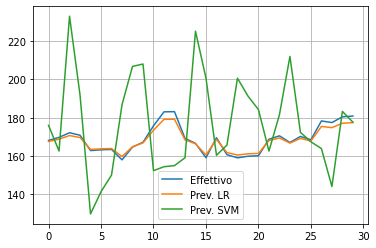

In [37]:
plt.plot(x_forecast, label = 'Effettivo')
plt.plot(lr_prediction, label = 'Prev. LR')
plt.plot(svm_prediction, label = 'Prev. SVM')
plt.grid(True)
plt.legend();


#### Previsione del prezzo di Ethereum con SVR
https://www.youtube.com/watch?v=HiDEAWdAif0&ab_channel=ComputerScience

In [38]:
from datetime import date, datetime
plt.style.use('fivethirtyeight')
import pandas_datareader.data as web
import pandas as pd


In [39]:
start_date = '2021-01-01'
end_date = '2021-05-15'
#end_date = datetime.today()

In [40]:
df = web.get_data_yahoo('ETH-USD', start_date, end_date) 

In [41]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [42]:
future_days = 5

In [43]:
# Creiamo una  nuova colonna con i prezzi futuri

In [44]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

In [45]:
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close,5_Day_Price_Forecast
Date,,,,,,,
2021-05-10,4197.473145,3684.451660,3924.413330,3952.293945,62691789007,3952.293945,3638.122070
2021-05-11,4178.208984,3783.889404,3948.271973,4168.701172,52679737865,4168.701172,3587.506104
2021-05-12,4362.350586,3785.848633,4174.635742,3785.848633,69023382175,3785.848633,NaN
2021-05-13,4032.563477,3549.407227,3828.918457,3715.148438,78398214539,3715.148438,NaN
2021-05-14,4171.017090,3703.399902,3720.122314,4079.057373,48174271215,4079.057373,NaN
2021-05-15,4129.185547,3638.122070,4075.951660,3638.122070,42422321751,3638.122070,NaN
2021-05-16,3878.895996,3350.951660,3641.830811,3587.506104,47359478734,3587.506104,NaN


Creiamo il data set per la previsione

In [46]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]

In [47]:
df.shape

(136, 7)

In [48]:
df.shape[0]

136

In [49]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])

In [50]:
y = y[:-future_days]
print(y)

[1207.11218262 1225.67810059 1224.19714355 1281.07727051 1262.2467041
 1090.14538574 1043.43457031 1130.73937988 1218.45300293 1171.83459473
 1233.53759766 1230.17224121 1257.27954102 1377.29589844 1382.27404785
 1121.57092285 1236.51220703 1230.99060059 1391.609375   1324.41479492
 1357.05810547 1253.18713379 1332.4921875  1382.52282715 1376.11547852
 1314.98620605 1369.04052734 1515.19372559 1660.9095459  1594.76269531
 1718.65087891 1677.84680176 1614.2277832  1746.61682129 1768.03503418
 1744.2434082  1783.79797363 1843.53259277 1814.10986328 1805.08410645
 1779.79101562 1781.06750488 1848.45825195 1937.44921875 1960.16479492
 1919.53405762 1935.60107422 1781.99291992 1570.20397949 1626.57568359
 1475.70373535 1446.03369141 1459.97314453 1416.0489502  1564.7076416
 1492.60876465 1575.85314941 1541.91430664 1533.27502441 1654.74157715
 1723.15380859 1834.72790527 1868.04882812 1799.16625977 1826.19494629
 1772.10241699 1924.6854248  1854.56433105 1791.70227051 1806.97180176
 1823.44

Creiamo il data set di addestramento e test

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [53]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf confidence score is: ', svr_rbf_confidence)

svr_rbf confidence score is:  0.9485912372368843


In [54]:
svm_prediction = svr_rbf.predict(x_test)

In [55]:
print(y_test)

[1171.83459473 1716.49462891 1799.16625977 1314.98620605 1854.56433105
 1814.10986328 2139.35327148 1691.33398438 1594.76269531 2093.12280273
 1377.29589844 4079.05737305 1230.99060059 1492.60876465 2364.75170898
 2773.20703125 1846.03369141 2945.89282227 1678.65014648 3928.84472656
 1843.53259277 1783.79797363 1781.06750488 1416.0489502  3638.12207031
 3522.78320312 3253.62939453]


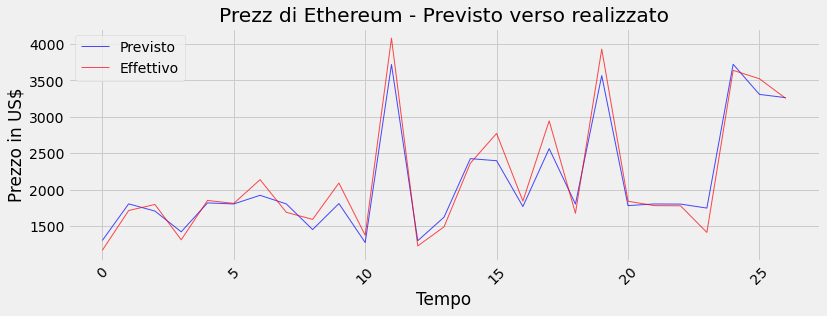

In [56]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Previsto', linewidth = '1', color ='b', alpha = .7)
plt.plot(y_test, label = 'Effettivo', linewidth = '1', color ='r', alpha = .7)
plt.title('Prezz di Ethereum - Previsto verso realizzato')
plt.ylabel('Prezzo in US$')
plt.xlabel('Tempo')
plt.legend()
plt.xticks(rotation = 45)
plt.show();
